Se tomara una fotografía a color para conviértala en una fotografía en tonos grises y con cada
pixel de la fotografía en grises y cada pixel de la fotografía a color se aplicara una vecindad de Moore
de 9 vecinos al pixel gris para obtener la regla para predecir el pixel a color. Se guardaran todas las reglas
encontradas y con base en esas reglas, se volvera a generar la imagen a color. Ahora, se convertira una fotografia
antigua a color con base en las reglas que encontradas.

Para esto primero importaremos las librerias a utilizar las cuales seran:

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Primeramente cargamos la imagen a convertir la mostramos y la convertimos en tonos grises para tambien mostrarla:

In [ ]:

# Cargar la imagen a color
image_color = cv2.imread('Imagen prueba 3.jpg')

# Mostrar la imagen a color original
plt.subplot(1, 4, 1)
plt.title('Imagen a Color')
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Convertir la imagen a tonos grises
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

# Mostrar la imagen en tonos grises
plt.subplot(1, 4, 2)
plt.title('Imagen en Tonos Grises')
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

Para poder guardar las reglas se usa un dicionario donde para cada píxel en la imagen en tonos grises, se toma una vecindad de Moore de 9 vecinos de esta manera:

Se crea un diccionario llamado color_rules para almacenar las reglas de predicción de color basadas en los valores de tonos grises.

Se recorren los píxeles en la imagen en tonos grises (excepto los bordes) utilizando bucles for anidados.

Para cada píxel en la posición (y, x) en la imagen en tonos grises, se obtiene su valor de gris (gray_value) y se recopilan los valores de color de sus 8 vecinos y el propio píxel en la imagen a color.

Se inicializa una variable llamada mean_color como un array de ceros con tres elementos para almacenar la suma de los valores de color de los vecinos.

Se itera a través de los colores de los vecinos y se suma cada valor de color al mean_color.

Después de recorrer todos los vecinos, se divide mean_color por la cantidad de vecinos (len(neighbors)) para calcular el promedio de los valores de color.

El valor de color promedio calculado se asigna como la regla de predicción en el diccionario color_rules para el valor de gris gray_value.

En resumen, esta parte del código calcula un valor de color promedio basado en los colores de los vecinos de un píxel en la imagen a color y lo asigna como la regla de predicción para el valor de gris correspondiente en el diccionario color_rules.

In [ ]:

# Crear un diccionario para almacenar las reglas de predicción
color_rules = {}

# Generar reglas de predicción de color
for y in range(1, image_gray.shape[0] - 1):
    for x in range(1, image_gray.shape[1] - 1):
        gray_value = image_gray[y, x]
        neighbors = [
            image_color[y-1, x-1], image_color[y-1, x], image_color[y-1, x+1],
            image_color[y, x-1], image_color[y, x], image_color[y, x+1],
            image_color[y+1, x-1], image_color[y+1, x], image_color[y+1, x+1]
        ]
        mean_color = np.zeros(3, dtype=np.uint32)  # Inicializar la suma de colores
        for neighbor_color in neighbors:
            mean_color += neighbor_color
        mean_color //= len(neighbors)  # Calcular el promedio de color
        color_rules[gray_value] = mean_color


Ya con las reglas se procede a convertir la imagen en tonos grises de nuevo a una imagen a color y mostrara el resultado para 
esto:

Se crea una imagen en blanco (colored_image_Gray) con las mismas dimensiones que la imagen en tonos grises (image_gray), pero con 3 canales de color (RGB) en lugar de un solo canal de tonos grises.

Se recorren los píxeles de la imagen en tonos grises utilizando bucles for anidados para cada fila (y) y columna (x).

En cada iteración, se obtiene el valor de tono de gris (gray_value) del píxel en la posición (y, x) en la imagen en tonos grises.

Se verifica si el valor de tono de gris existe en el diccionario color_rules.

Si existe una regla de conversión para ese valor de tono de gris en el diccionario color_rules, se asigna el valor de color correspondiente a la posición (y, x) en la imagen en blanco (colored_image_Gray).

En resumen, este código recorre la imagen en tonos grises, verifica las reglas de conversión en el diccionario color_rules y asigna colores correspondientes en la imagen en blanco para generar una versión a color basada en las reglas predefinidas.

In [ ]:

# Crear una imagen en blanco para almacenar la versión a color
colored_image_Gray = np.zeros((image_gray.shape[0], image_gray.shape[1], 3), dtype=np.uint8)

# Aplicar reglas de conversión para generar la versión a color
for y in range(image_gray.shape[0]):
    for x in range(image_gray.shape[1]):
        gray_value = image_gray[y, x]
        if gray_value in color_rules:
            colored_image_Gray[y, x] = color_rules[gray_value]

# Mostrar la versión a color generada
plt.subplot(1, 4, 3)
plt.title('Foto colorizada')
plt.imshow(cv2.cvtColor(colored_image_Gray, cv2.COLOR_BGR2RGB))
plt.axis('off')

Se hace exactamente el mismo proceso pero ahora cargando una imagen a balnco y negro:

In [ ]:
# Cargar la foto antigua en tonos grises
old_image_gray = cv2.imread('Negro11.jpg', cv2.IMREAD_GRAYSCALE)

# Crear una imagen en blanco para almacenar la versión a color
colored_image = np.zeros((old_image_gray.shape[0], old_image_gray.shape[1], 3), dtype=np.uint8)

# Aplicar reglas de predicción para generar la versión a color
for y in range(old_image_gray.shape[0]):
    for x in range(old_image_gray.shape[1]):
        gray_value = old_image_gray[y, x]
        if gray_value in color_rules:
            colored_image[y, x] = color_rules[gray_value]

# Mostrar la versión a color generada
plt.subplot(1, 4, 4)
plt.title('Foto Antigua Colorizada')
plt.imshow(cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB))
plt.axis('off')


Ahora se muestran las 4 imagenes

In [ ]:

# Mostrar todas las imágenes
plt.tight_layout()
plt.show()

El resultado seria:

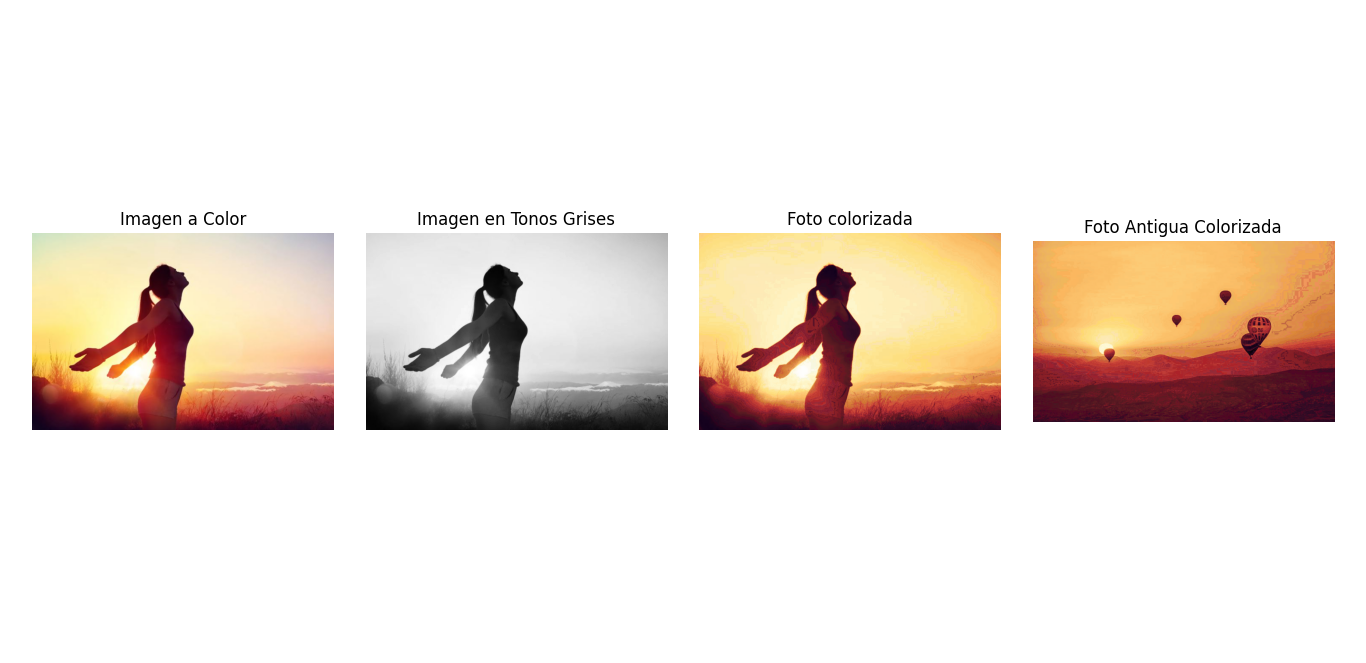

Otro resultado:

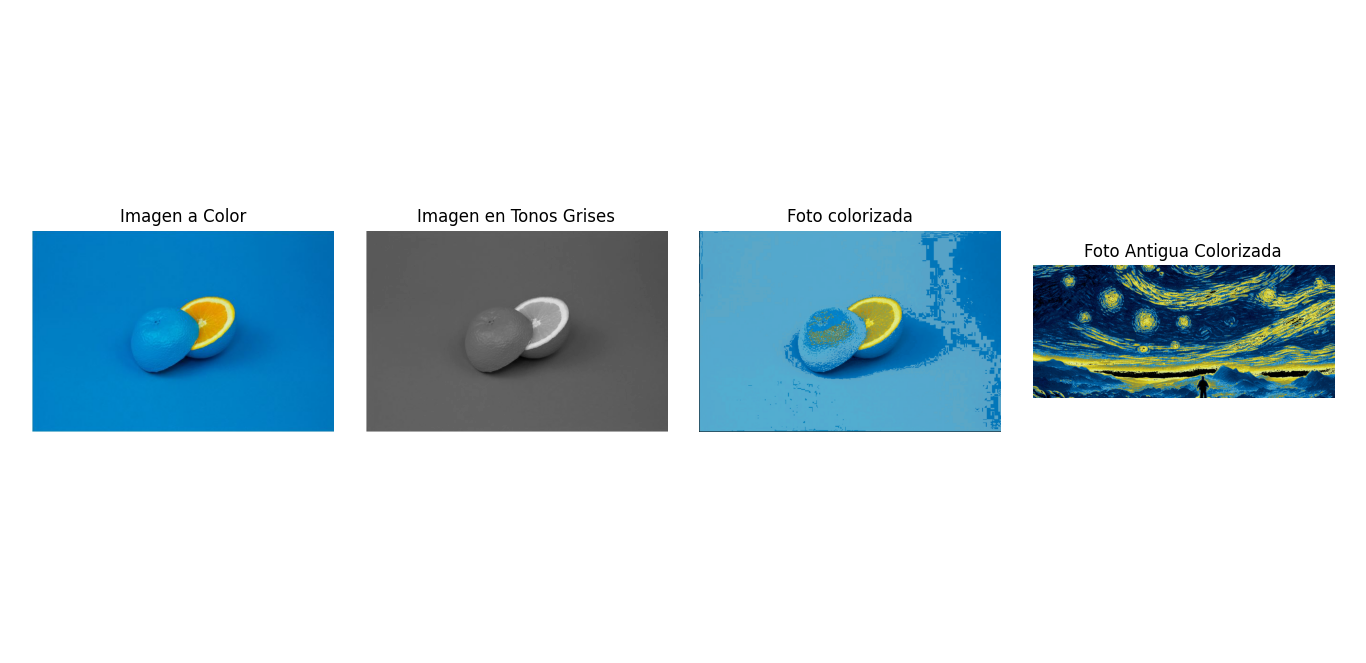